In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
demo = pd.read_csv("/content/drive/MyDrive/롯데 공모전/dataset/LPOINT_BIG_COMP_01_DEMO.csv") #고객 데모 정보

In [ ]:
pdde = pd.read_csv("/content/drive/MyDrive/롯데 공모전/dataset/LPOINT_BIG_COMP_02_PDDE.csv") #상품 구매 정보(유통사 상품 구매 내역)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
lpay = pd.read_csv("/content/drive/MyDrive/롯데 공모전/dataset/LPOINT_BIG_COMP_06_LPAY.csv") #엘페이 이용(엘페이 결제 내역)

In [ ]:
pd_clac = pd.read_csv("/content/drive/MyDrive/롯데 공모전/dataset/LPOINT_BIG_COMP_04_PD_CLAC.csv") #상품 분류 정보(유통사 상품 카테고리 마스터)

### 상품 구매 정보

In [ ]:
pdde.head() #고객번호, 영수증번호, 채널 구분(1.오프, 2.온라인), 제휴사, 상품코드, 점포코드, 구매 일자, 구매 시간, 구매 금액, 구매수량

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


#### 실 사용자 수

In [ ]:
print("상품 구매 정보 사용자 수: ", len(pdde['cust']))
print("상품 구매 정보 실사용자 수: ", len(pdde['cust'].unique()))

print()
print("가입 고객 수:", len(demo))
print("가입 고객 중 실구매한 비율: ", len(pdde['cust'].unique())/len(demo)*100)

print()
print('상품 고객 중 lpay를 사용해 구매한 비율: ', len(lpay['cust'].unique())/len(pdde['cust'].unique())*100)

상품 구매 정보 사용자 수:  4381743
상품 구매 정보 실사용자 수:  26917

가입 고객 수: 29913
가입 고객 중 실구매한 비율:  89.98428776786012

상품 고객 중 lpay를 사용해 구매한 비율:  33.08689675669651


#### 주 이용 시간대 및 요일, 월

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

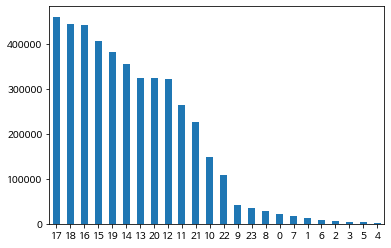

In [ ]:
pdde['de_hr'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

낮, 저녁-밤 시간대

In [ ]:
from datetime import datetime

a = pdde['de_dt'].astype('str')
pdde['de_dt']  = pd.to_datetime(a)
pdde['day'] = pdde['de_dt'].map(lambda x : x.strftime('%A'))

pdde.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,day
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,Friday
1,M646853852,A01000002265,1,A01,A010025,PD1369,2021-01-01,10,79700.0,1,Friday
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,Friday
3,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,Friday
4,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,Friday


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

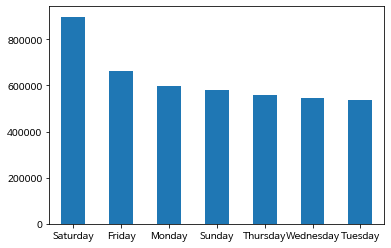

In [ ]:
pdde['day'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

앞도적으로 토요일이 많음

In [ ]:
pdde['month'] = pdde['de_dt'].dt.month

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

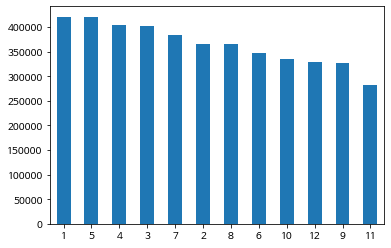

In [ ]:
pdde['month'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

1, 5월 높음 (연초, 가정의 달) ?
연말, 명절에 높을 줄 알았는데 의외

#### 한 영수증 당 평균 결제 금액

In [ ]:
pdde2 = pdde.groupby(['rct_no']).sum()[['buy_am','buy_ct']]

In [ ]:
print('결제 금액 평균(한 영수증당): ', pdde2['buy_am'].mean())
print('결제 금액 최대(한 영수증당): ', pdde2['buy_am'].max())
print('결제 금액 최소(한 영수증당): ', pdde2['buy_am'].min())

결제 금액 평균(한 영수증당):  80303.37733629456
결제 금액 최대(한 영수증당):  64000000.0
결제 금액 최소(한 영수증당):  10.0


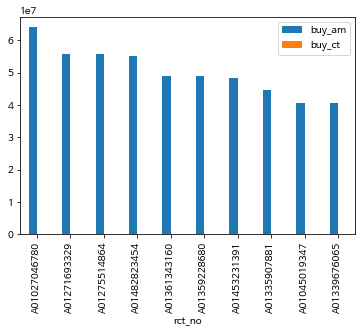

In [ ]:
pdde2.sort_values(by='buy_am', ascending=False)[:10].plot(kind='bar')

In [ ]:
pdde2.sort_values(by='buy_am', ascending=False)[:10]

,buy_am,buy_ct
rct_no,,
A01027046780,64000000.0,1
A01271693329,55680000.0,1
A01275514864,55680000.0,1
A01482823454,55090000.0,1
A01361343160,49100000.0,1
A01359228680,49100000.0,1
A01453231391,48380000.0,1
A01335907881,44690000.0,1
A01045019347,40700000.0,1


유독 한 사람이 매우 매우 큰 금액을 결제함 ?0?

In [ ]:
pdde[pdde['rct_no']=='A01027046780']

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,day
38739,M750310186,A01027046780,1,A01,A010001,PD1752,2021-01-26,16,64000000.0,1,Tuesday


In [ ]:
pdde[pdde['cust']=='M750310186']['buy_am'].sum()

143989820.0

In [ ]:
pd_clac[pd_clac['pd_c']=='PD1752']

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
1751,PD1752,남성시계,패션잡화,시계


In [ ]:
pdde[pdde['rct_no']=='A01271693329']

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,day
380865,M288629527,A01271693329,1,A01,A010004,PD1751,2021-07-18,12,55680000.0,1,Sunday


In [ ]:
pdde[pdde['cust']=='M288629527']['buy_am'].sum()

368955660.0

#### 인 당 평균 결제 금액

In [ ]:
pdde3 = pdde.groupby(['cust']).sum()[['buy_am','buy_ct']]

In [ ]:
print('결제 금액 평균(한 사람당): ', pdde3['buy_am'].mean())
print('결제 금액 최대(한 사람당): ', pdde3['buy_am'].max())
print('결제 금액 최소(한 사람당): ', pdde3['buy_am'].min())

결제 금액 평균(한 사람당):  3778703.9564958946
결제 금액 최대(한 사람당):  386581410.0
결제 금액 최소(한 사람당):  10.0


#### 온라인 vs 오프라인

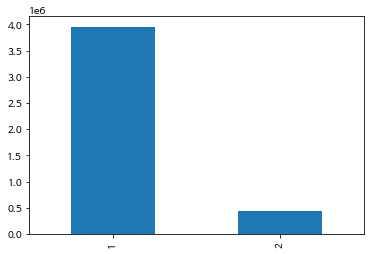

In [ ]:
pdde['chnl_dv'].value_counts().plot(kind='bar')

In [ ]:
off = pdde[pdde['chnl_dv']==1]
on = pdde[pdde['chnl_dv']==2]

- 이용시간대

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

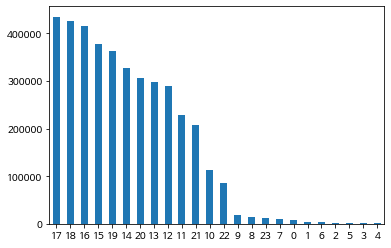

In [ ]:
off['de_hr'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

17.17.16

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

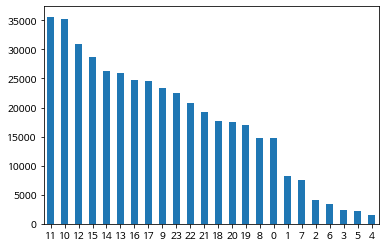

In [ ]:
on['de_hr'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

11.10.12.15

- 구매 요일

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

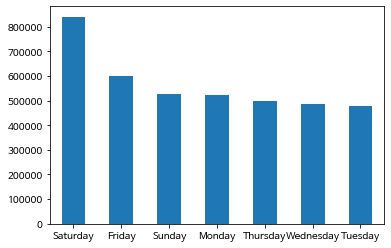

In [ ]:
off['day'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

토, 금, 일

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

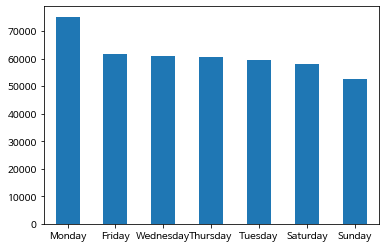

In [ ]:
on['day'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

월, 금, 수

- 구매 월

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

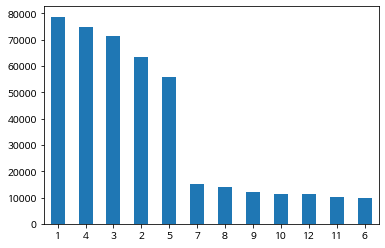

In [ ]:
on['month'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

1.4.3.2.5

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

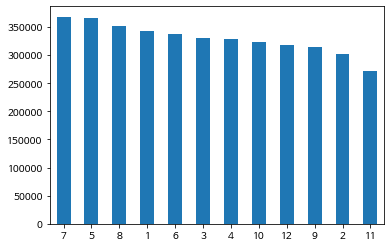

In [ ]:
off['month'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

7.5.8

- 구매 금액

In [ ]:
off['buy_am'].value_counts()

1000.0      95772
2000.0      92500
3000.0      66854
1980.0      65923
2980.0      64055
            ...  
16611.0         1
22671.0         1
10278.0         1
423300.0        1
398050.0        1
Name: buy_am, Length: 32892, dtype: int64

In [ ]:
on['buy_am'].value_counts()

3980.0      9138
1980.0      8416
2980.0      8039
4980.0      7089
2000.0      6434
            ... 
216300.0       1
168400.0       1
47160.0        1
72460.0        1
73100.0        1
Name: buy_am, Length: 6048, dtype: int64

- 구매 수량

In [ ]:
off['buy_ct'].value_counts()[:10]

1     3370000
2      394944
3       89338
4       38439
5       19005
6       10976
10       7225
8        4788
9        3627
7        3432
Name: buy_ct, dtype: int64

In [ ]:
on['buy_ct'].value_counts()[:10]

1     370578
2      36935
3       8809
4       3728
5       3051
6       1675
10      1306
8        474
7        380
20       324
Name: buy_ct, dtype: int64

### 엘페이

In [ ]:
lpay.head() #고객번호, 영수증번호, 제휴사, 채널 구분, 이용일자, 이용시간, 이용금액

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


#### 사용 채널 비교

In [ ]:
print("lpay를 사용하고, 오프라인에서 구매한 고객 수: ", lpay['chnl_dv'].value_counts()[1])
print("lpay를 사용하고, 온라인에서 구매한 고객 수: ", lpay['chnl_dv'].value_counts()[2])

lpay를 사용하고, 오프라인에서 구매한 고객 수:  150010
lpay를 사용하고, 온라인에서 구매한 고객 수:  203174


In [ ]:
print("온프라인에서 구매한 고객 수: ", pdde['chnl_dv'].value_counts()[1])
print("온라인에서 구매한 고객 수: ", pdde['chnl_dv'].value_counts()[2])

온프라인에서 구매한 고객 수:  3953242
온라인에서 구매한 고객 수:  428501


In [ ]:
print("오프라인+lpay 비율: ", lpay['chnl_dv'].value_counts()[1]/ pdde['chnl_dv'].value_counts()[1])
print("온라인+lpay 비율: ", lpay['chnl_dv'].value_counts()[2]/ pdde['chnl_dv'].value_counts()[2])

오프라인+lpay 비율:  0.037946070592187374
온라인+lpay 비율:  0.47415058541286953


#### 주 이용 시간대 및 요일, 월

In [ ]:
from datetime import datetime

a = lpay['de_dt'].astype('str')
lpay['de_dt']  = pd.to_datetime(a)
lpay['day'] = lpay['de_dt'].map(lambda x : x.strftime('%A'))
lpay['month'] = lpay['de_dt'].dt.month

lpay.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,day,month
0,M629656521,210803210311226,A03,1,2021-08-03,21,10900,Tuesday,8
1,M216016456,210803130167542,L01,2,2021-08-03,13,6860,Tuesday,8
2,M205142844,210803140275112,A02,1,2021-08-03,14,9000,Tuesday,8
3,M737010483,210803040637594,A06,2,2021-08-03,4,36740,Tuesday,8
4,M707775545,210803140675502,A06,2,2021-08-03,14,138500,Tuesday,8


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

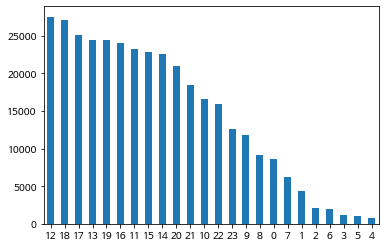

In [ ]:
lpay['de_hr'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

기본 상품 구매 정보와 유사하지만 9,23에도 사용 내역 꽤 있음

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

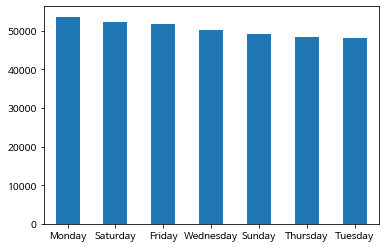

In [ ]:
lpay['day'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

월.토.금

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

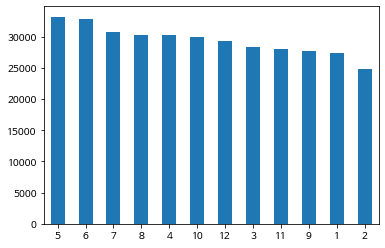

In [ ]:
lpay['month'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

5.6월


- 엘페이을 이용한 마케팅 ? ex) 네이버페이, 카카오페이, 토스페이 등
- 자사 결제수단을 많이 만들고 있는 추세가 아닌가 ?: